In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('../data/processed/cleaned_data.csv')

In [4]:
# Select relevant features for prediction
features = ['season','driverId','constructorId','driverStartGridPos', 'driverFinalGridPos',
            'driverChampionshipStandingPosition','constructorChampionshipStandingPosition']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df['driverFinalRank'], test_size=0.2, random_state=42)

# Create Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:', accuracy)

Model Accuracy: 0.5989992852037169


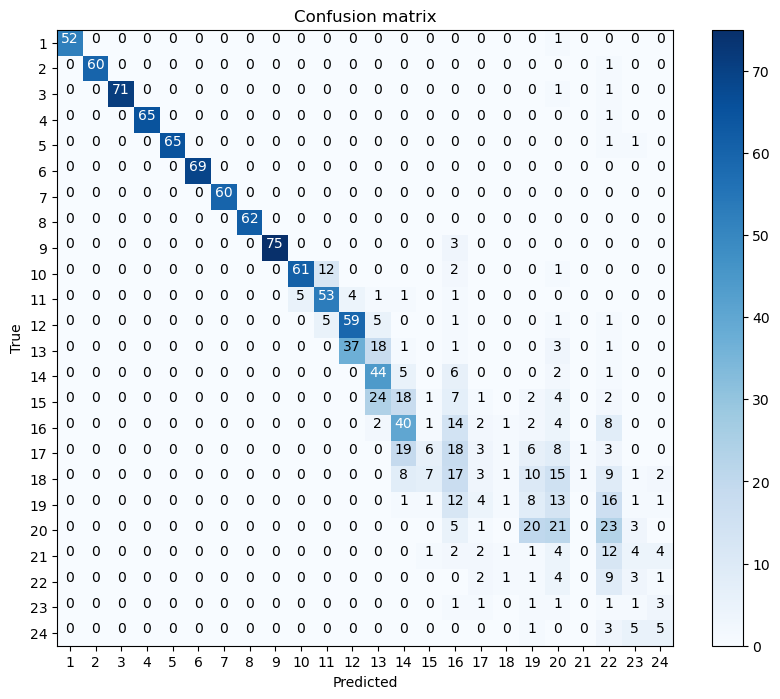

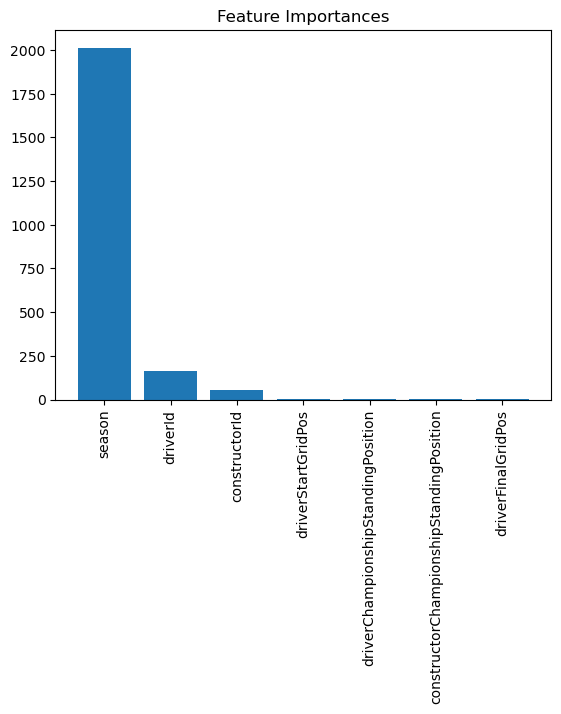

In [19]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot the ROC curve
#plot_roc_curve(gnb, X_test, y_test)
#plt.title("ROC Curve")
#plt.show()

# Plot the precision-recall curve
#plot_precision_recall_curve(gnb, X_test, y_test)
#plt.title("Precision-Recall Curve")
#plt.show()

# Plot the feature importance graph
importances = gnb.theta_[0]
indices = np.argsort(importances)[::-1]
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.title("Feature Importances")
plt.show()
